# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [1]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Import Statements

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [3]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


     |████████████████████████████████| 79 kB 3.7 MB/s 
     |████████████████████████████████| 3.5 MB 29.6 MB/s 
     |████████████████████████████████| 1.2 MB 43.9 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 6.8 MB 32.2 MB/s 
     |████████████████████████████████| 895 kB 55.2 MB/s 
     |████████████████████████████████| 596 kB 46.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=978b61a156224a9982fc8c54ca37da3c1b986580f675f9f0b8743a4a80d8a307
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [4]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))

In [5]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [8]:

def get_review_embedding(article):
  sentences = pre_process_article(article)
  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended
  sentence_embeddings = bert_model.encode(sentences)
  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)
  return review_embedding

In [9]:
X=[]
# for i in newsgroups_train['data']:
#   X.append(get_review_embedding(i))
import pickle
# with open('/content/drive/MyDrive/q1/tp_file', 'wb') as fp:
#     pickle.dump(X, fp)
with open ('/content/drive/MyDrive/q1/tp_file', 'rb') as fp:
    X = pickle.load(fp)

In [10]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA(n_components=2)
transformed_X=pca.fit_transform(X)

Text(0.5, 1.0, 'Data Visualization')

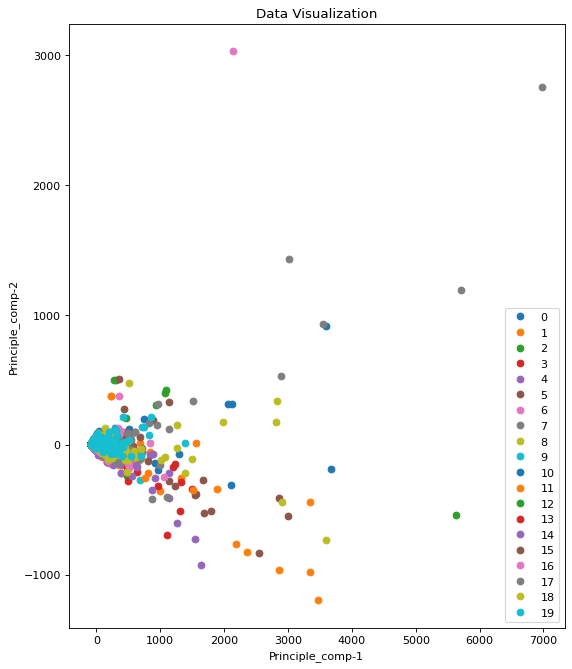

In [11]:
from matplotlib.pyplot import figure
import pandas as pd
data = pd.DataFrame({"Principle_comp-1": transformed_X[:,0], "Principle_comp-2": transformed_X[:,1], "Category": newsgroups_train['target']})
figure(figsize=(8,10), dpi=80)
groups = data.groupby("Category")
for name, group in groups:
    plt.plot(group["Principle_comp-1"], group["Principle_comp-2"], marker="o", linestyle="", label=name)
plt.legend()

# plt.scatter(transformed_X[:,0], transformed_X[:,1], s=50, cmap='viridis')
plt.xlabel('Principle_comp-1')
plt.ylabel('Principle_comp-2')
plt.title('Data Visualization')
# plt.show()

# K_Means Algorithm


In [12]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans
X=np.array(X)
kmeans = KMeans(n_clusters=2, random_state=4)
labels=kmeans.fit_predict(np.array(X))

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)


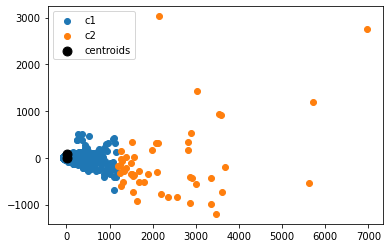

<class 'sklearn.cluster._kmeans.KMeans'>


In [13]:
#code for visualisation of clusters
#plotting the results: 
for i in u_labels:
    plt.scatter(transformed_X[labels == i , 0] , transformed_X[labels == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend(['c1','c2','centroids'])
plt.show()
# kmeans.labels_
print(type(kmeans))

# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







In [14]:
def elbow_method(X):
  inertias = []
  mapping1 = {}
  mapping2 = {}
  K = range(1, 10)
  for k in K:
      # Building and fitting the model
      kmeanModel = KMeans(n_clusters=k).fit(X)
      kmeanModel.fit(X)
      inertias.append(kmeanModel.inertia_)
      mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                    'euclidean'), axis=1)) / X.shape[0]
      mapping2[k] = kmeanModel.inertia_
  return inertias,K

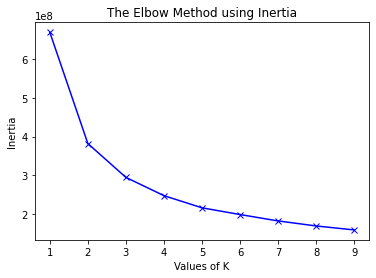

In [15]:
inertias,K=elbow_method(X)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

The optimal number of clusters we have to select is the value of k at the “elbow” i.e, the point after which the distortion/inertia start decreasing in a linear fashion

here the value of K is 2

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




In [16]:
sil = []
K = range(2, 10)
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in K:
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

In [17]:
len(sil),len(K)

(8, 8)

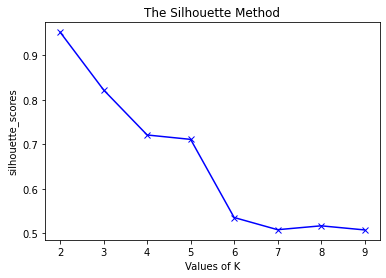

In [18]:
plt.plot(K, sil, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('silhouette_scores')
plt.title('The Silhouette Method')
plt.show()

Silhouette analysis can be used to study the separation distance between the resulting clusters.
The higher is the silhouette_scores the better is the K value

here, the value is 2


# Agglomerative clustering

code to write your Kmeans algorithm

implement your KMeans algorithm here, and visualise the clusters obtained 

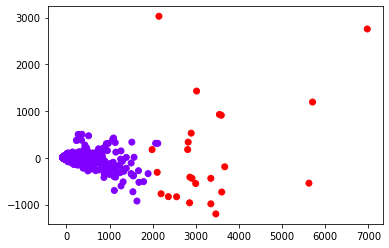

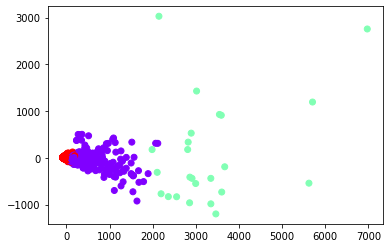

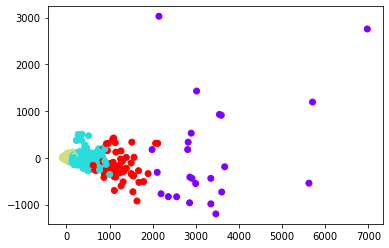

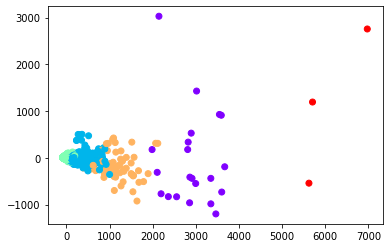

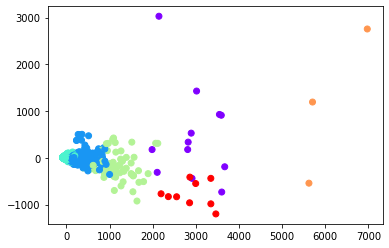

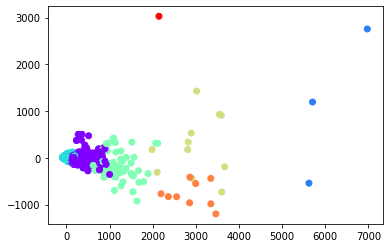

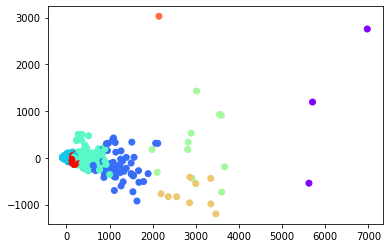

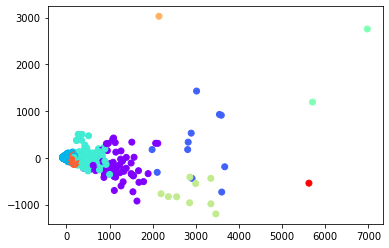

In [19]:
K=[i for i in range(2,10)]
for k in K:
  clustering_labels = AgglomerativeClustering(n_clusters=k).fit(X)
  plt.scatter(transformed_X[:, 0],transformed_X[:, 1], c=clustering_labels.labels_, cmap='rainbow')
  plt.show()

# Dendogram


*   Try to understand the difference between agglomerative clustering and devisive clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



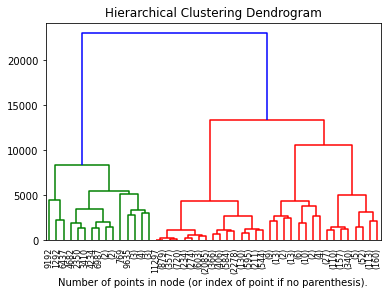

In [20]:
def plot_dendrogram(model, **kwargs):
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
          if child_idx < n_samples:
              current_count += 1
          else:
              current_count += counts[child_idx - n_samples]
      counts[i] = current_count
  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
  dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In the dendrogram, locating the largest vertical difference between nodes, and in the middle pass an horizontal line. The number of vertical lines intersecting it is the optimal number of clusters. 

Here the optimal number of clusters is 2

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


